![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Q1. [LeetCode 73: Set Matrix Zeroes](https://leetcode.com/problems/set-matrix-zeroes/); Difficulty: ${\color{orange}{Medium}}$

## Description

Given an `m x n` integer matrix `matrix`, if an element is `0`, set its entire row and column to `0`'s.

You must do it **in place.**

**Example 1**:

- **Input**: `matrix = [[1,1,1],[1,0,1],[1,1,1]]`
- **Output**: `[[1,0,1],[0,0,0],[1,0,1]]`

**Example 2**:

- **Input**: `matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]`
- **Output**: `[[0,0,0,0],[0,4,5,0],[0,3,1,0]]`


**Constraints**:

- `m == matrix.length`
- `n == matrix[0].length`
- `1 <= m, n <= 200`
- $-2^{31} <= matrix[i][j] <= 2^{31} - 1$


**Follow up**:

- A straightforward solution using $O(mn)$ space is probably a bad idea.
- A simple improvement uses $O(m + n)$ space, but still not the best solution.
- Could you devise a constant space solution?

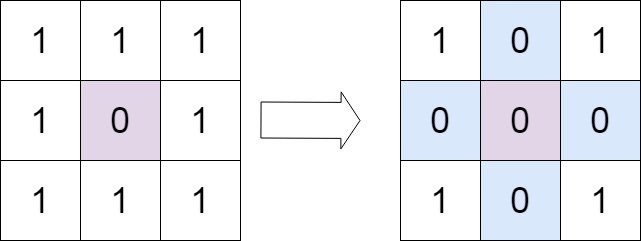

In [1]:
# Example 1

from IPython import display
display.Image("data/images/04-Strivers-SDE-Sheet/Day_01_Arrays-01.jpg")

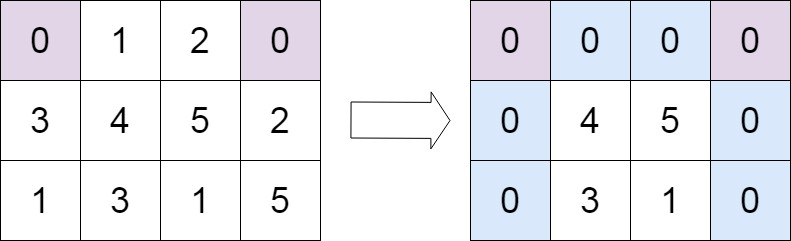

In [2]:
# Example 2

from IPython import display
display.Image("data/images/04-Strivers-SDE-Sheet/Day_01_Arrays-02.jpg")

## Solution 1: Brute-Force Approach

**Logic:**

- Create a new array `unique_nums` to store unique elements
- Use it to update `nums` & return its length.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

Difficulty: ${\color{green}{Easy}}$
Difficulty: ${\color{orange}{Medium}}$
Difficulty: ${\color{red}{Hard}}$

In [ ]:
# Deep Learning as subset of ML

from IPython import display
display.Image("data/images/DL_01_Intro-01-DL-subset-of-ML.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)